****
<a id='lesson-3'></a>
# Module :  Integration
Author-Rishith Sunil
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes:
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function.

When $\rho(x)$ is a probability density function,
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# WORKBOOK STARTS from here

# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

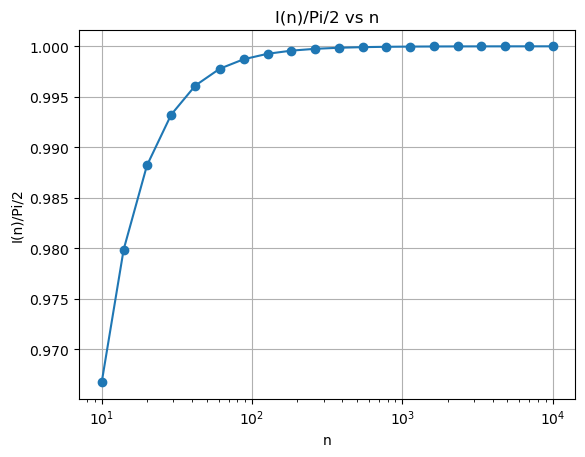

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
def semicircle(x,s=0): 
    return math.sqrt(1-x**2)
    
def integral(func,a,b,n):
    h=(b-a)/n
    area=0
    for i in range(0,n):
        area+=func(a+i*h)*h
    return area
#print(integral(semicircle,-1,1,10))
#print(math.pi/2)
x=np.logspace(1,4,num=20,dtype=int)
y=[integral(semicircle,-1,1,i)/(math.pi/2) for i in x]
plt.plot(x,y,marker="o",linestyle="-")
plt.xscale("log")
plt.xlabel("n")
plt.ylabel("I(n)/Pi/2")
plt.title("I(n)/Pi/2 vs n")
plt.grid(True)
plt.show()



In [1]:
a=["a"*5]
print(a)

['aaaaa']


# Adaptive grid method (Task-2)

## Homework
Generic idea is the following:
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

In [3]:
import math
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
def semicircle(x):
    return math.sqrt(1-x**2)

def derivative(x):
    if abs(x) >= 1:  # Handle edge cases where derivative is undefined
        return 0
    return -x / math.sqrt(1 - x**2) 
    
    
    

def integral(func,a,b):
    area=0.0
    xi=a
    while xi<b:
        deriv=derivative(xi)
        hi=1e-6/(1+abs(deriv))
    
        x_next = min(xi + hi, b)
            
        area += func(xi)*hi
        xi=x_next
            
        xi = x_next
        
    return area
print(integral(semicircle,-1,1))


1.570796325852725


In [18]:
import math

# Define the semicircle function
def f(x):
    return math.sqrt(1 - x**2)

# Hardcoded derivative of the semicircle function
def f_derivative(x):
    if abs(x) >= 1:  # Handle edge cases where derivative is undefined
        return 0
    return -x / math.sqrt(1 - x**2)

# Adaptive numerical integration with hardcoded derivative
def adaptive_integral(func, func_derivative, a, b, tol=1e-6):
    x_i = a  # Start at x_0 = a
    integral_value = 0.0  # Initialize the integral value

    while x_i < b:
        # Compute the derivative at x_i
        deriv = func_derivative(x_i)
        
        # Choose h_i inversely proportional to |f'(x_i)|
        h_i = tol / (1 + abs(deriv))  # Ensure h_i is not too large
        
        # Ensure x_{i+1} does not exceed b
        x_next = min(x_i + h_i, b)
        
        # Compute the contribution of this interval to the integral
        # Using the trapezoidal rule for simplicity
        contribution = (func(x_i) + func(x_next)) * (x_next - x_i) / 2
        integral_value += contribution
        
        # Update x_i for the next iteration
        x_i = x_next
    
    return integral_value

# Example usage
a = -1
b = 1
result = adaptive_integral(f, f_derivative, a, b)
exact_result = math.pi / 2  # Exact integral of semicircle from -1 to 1

print(f"Estimated Integral: {result}")
print(f"Exact Integral: {exact_result}")
print(f"Error: {abs(result - exact_result)}")

Estimated Integral: 1.570796326558941
Exact Integral: 1.5707963267948966
Error: 2.359554773789796e-10


# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points



1. function ComputeQuarterCircleArea(num_random_pts)
2. for each pt in range(num_random_pts):
        set pt = (random x, random y)
        check if pt is inside the circle
3. Estimate area of the quarter cicle.


In [20]:
import random
n=10000
def ComputeQuarterCircleArea(num_random_pts):
    n_inside=0
    for i in range(num_random_pts):
        x=random.random()
        y=random.random()
        if(x**2 + y**2 <=1):
            n_inside+=1
    return (n_inside/num_random_pts)
ans=ComputeQuarterCircleArea(n)
print(ans)

0.7841


### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

1. MonteCarlo_Uniform(f,a,b,num_points): to integrate f in x in [a,b] using num_point samples of uniform distribution


In [18]:
def semicircle(x,s=0):
    if(s==1):
        return sp.sqrt(1-x**2)
    return np.sqrt(1-x**2)


def MonteCarlo_Uniform(f,a,b,num_points):
    x=np.random.uniform(a,b,num_points)
    f_values=f(x)
    int=np.mean(f_values)*(b-a)
    return int
ans=MonteCarlo_Uniform(semicircle,-1,1,10000000)*2
print(ans)
    
    
    
    
    

    

3.14183332863528


## Task 4.2: Similar to  Task 4.1
### Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)




In [17]:
from scipy.stats import norm
import numpy as np
def semicircle(x,s=0):
    if(s==1):
        return sp.sqrt(1-x**2)
    return np.sqrt(1-x**2)


def MonteCarlo_Normal(f,a,b,num_points):
    x=np.random.normal(0,1,num_points)
    x=x[(x >= a) & (x <= b)]
    f_values=f(x)
    p=norm.pdf(x, 0, 1)
    
    int=np.mean(f_values/p)*(norm.cdf(b, 0, 1) - norm.cdf(a, 0, 1))
    return int
ans=MonteCarlo_Normal(semicircle,-1,1,10000)*2
print(ans)


3.1446134683647884


# Task 5: Compute error(N) for various N, for computing area of circle using Monte Carlo methods
1. Naive Monte Carlo
2. Importance sampling with uniform distribution
3. Importance sampling with gaussian distribution

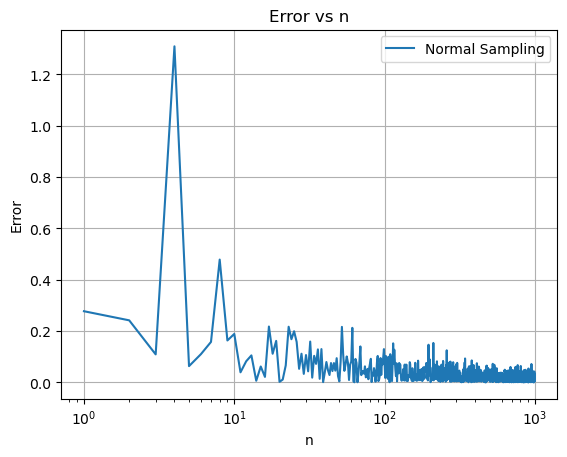

In [22]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x=list(range(1,1000))
nor=[]
unif=[]
naiv=[]
for i in range(1,1000):
    nor.append(abs(MonteCarlo_Normal(semicircle,-1,1,i)*2-math.pi))
    unif.append(abs(MonteCarlo_Uniform(semicircle,-1,1,i)*2-math.pi))
    naiv.append(abs(ComputeQuarterCircleArea(i)*4-math.pi))
plt.plot(x,nor,linestyle="-",label="Normal Sampling")
plt.plot(x,unif,linestyle="-",label="Uniform Sampling")
plt.plot(x,naiv,linestyle="-",label="Naive Monte Carlo")
plt.xscale("log")
plt.xlabel("n")
plt.ylabel("Error")
plt.title("Error vs n")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
print(np.random.uniform(1,10,5))

[7.83841654 6.54333907 3.80412502 3.80283872 8.58542039]


Integral using Normal Sampling: 1.578963982493356
Integral using Uniform Sampling: 1.5645380050726883


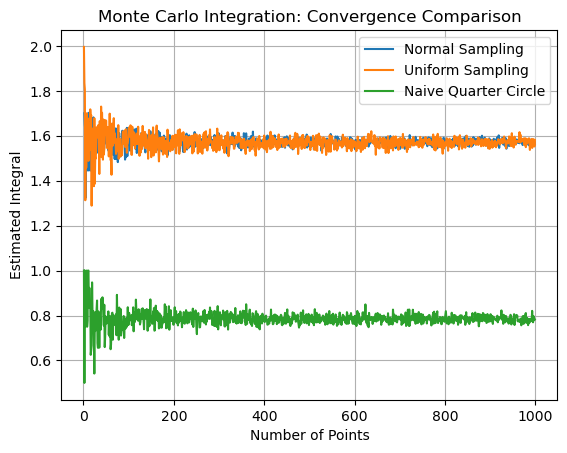

In [36]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate x values
x=np.logspace(1,4,num=20,dtype=int)

# Compute integrals using different methods
nor = []
unif = []
naiv = []
for i in x:
    nor.append(MonteCarlo_Normal(semicircle, -1, 1, i))
    unif.append(MonteCarlo_Uniform(semicircle, -1, 1, i))
    naiv.append(ComputeQuarterCircleArea(i))

# Plot the results
plt.plot(x, nor, label="Normal Sampling", linestyle="-")
plt.plot(x, unif, label="Uniform Sampling", linestyle="-")
plt.plot(x, naiv, label="Naive Quarter Circle", linestyle="-")
plt.xlabel("Number of Points")
plt.ylabel("Estimated Integral")
plt.title("Monte Carlo Integration: Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()